### **RFM Analysis for Customer Segmentation and Cohort Analysis**


Anthony Yabuki, Amriha Farswani, Diego Segura, Hajira Z. Husain (Juju)

**Problem Definition:**

This project aims to perform cohort analysis and customer segmentation using RFM (Recency, Frequency, Monetary) analysis to gain insights into customer behavior and identify actionable business opportunities. The project involves creating cohort groups, calculating cohort periods, and analyzing customer behavior based on Recency, Frequency, and Monetary value. The analysis will provide insights into customer retention, churn rate, and customer lifetime value.


**Data description:**

The dataset used in this project is a transnational data set containing transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based, non-store online retail company. The company primarily sells unique all-occasion gifts, with many of their customers being wholesalers. The dataset comprises 541,909 instances, including 8 attributes: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

**Attribute Information:**



**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

**Data Source:**

The data is sourced from the UCI Machine Learning Repository and Kaggle:https://archive.ics.uci.edu/ml/datasets/Online+Retail#\nhttps://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

The dataset was donated by Dr. Daqing Chen, Director of the Public Analytics group at the School of Engineering, London South Bank University, UK.

**Problem Importance:**

The problem of cohort analysis and customer segmentation using RFM (Recency, Frequency, Monetary) analysis is vital for businesses, as it offers valuable insights into customer behavior, enabling the identification of actionable business opportunities. By analyzing customer behavior based on Recency, Frequency, and Monetary value, businesses can gain a deeper understanding of customer retention, churn rate, and customer lifetime value.The ability to identify high-value customers and design tailor-made services for specific customer segments can lead to increased revenue and customer loyalty. Moreover, understanding customer behavior and preferences enables businesses to optimize their marketing strategies, allocate resources effectively, and ultimately enhance overall business performance.

**Introduction & Motivation**

Customer retention and understanding customer behavior are essential for the success of any business. The ability to identify high-value customers and design custom-made services for specific customer segments can lead to increased revenue and customer loyalty. Our analysis takes a deep dive into customer segmentation using Recency, Frequency, and Monetary. Which is helpful in any industry to track trends and customer behavior. We believe this customer analysis is valuable to understand in our careers as business leaders.

**Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Dataset into a Pandas DataFrame:**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)


**About the dataset:**

In [ ]:
print(f"Dataset shape: {df.shape}")
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Dataset shape: (541909, 8)
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


**Data cleaning:**

In [ ]:
#Check for missing values: identify the presence of missing values in the dataset.
df.isnull().sum()

#Remove rows with missing values: 'CustomerID' is crucial for the RFM analysis, and rows with missing 'CustomerID' values cannot be used in the analysis.
df.dropna(subset=['CustomerID'], inplace=True)

#Check for duplicates: Duplicate rows can affect the accuracy of the analysis and lead to misleading results.
df.duplicated().sum()

#Remove duplicates: This improves the reliability of the analysis and prevents potential issues arising from duplicated data.
df.drop_duplicates(inplace=True)

#Convert InvoiceDate to datetime data type: enable easier manipulation and analysis of date-related information.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Remove negative values in 'Quantity' and 'UnitPrice': By removing rows with negative values, we can ensure that the analysis only considers valid transactions.
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]



**Insights into customer behavior and RFM analysis**

In [ ]:
# What is the distribution of Recency, Frequency, and Monetary value?

# Calculate the Monetary value
monetary_value = df.groupby('CustomerID').agg({'UnitPrice': lambda x: sum(x * df.loc[x.index, 'Quantity'])})

# Calculate the Frequency value
frequency_value = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})

# Calculate the Recency value
max_date = df['InvoiceDate'].max()
recency_value = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (max_date - x.max()).days})

# Combine the values into a single DataFrame
rfm = pd.DataFrame({'Recency': recency_value['InvoiceDate'], 'Frequency': frequency_value['InvoiceNo'], 'Monetary': monetary_value['UnitPrice']})

rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,91.536422,4.272015,2048.688081
std,100.014169,7.697998,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,306.482500
50%,50.000000,2.000000,668.570000
75%,141.000000,5.000000,1660.597500
max,373.000000,209.000000,280206.020000


**How many unique customers are there in the dataset?**

**What is the average number of transactions per customer?**

**What is the average revenue per transaction?**

In [ ]:
#How many unique customers are there in the dataset?
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

#What is the average number of transactions per customer?
avg_transactions_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().mean()
print(f"Average number of transactions per customer: {avg_transactions_per_customer:.2f}")

#What is the average revenue per transaction?
df['Revenue'] = df['UnitPrice'] * df['Quantity']
avg_revenue_per_transaction = df['Revenue'].sum() / df['InvoiceNo'].nunique()
print(f"Average revenue per transaction: {avg_revenue_per_transaction:.2f}")


Number of unique customers: 4338
Average number of transactions per customer: 4.27
Average revenue per transaction: 479.56


**What is the distribution of customers by country?**

In [ ]:
#What is the distribution of customers by country?
customer_country = df.groupby('Country')['CustomerID'].nunique()
print(customer_country)

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   94
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     30
Sweden                     8
Switzerland               21
USA                        4
United

**What are the top 10 most popular products based on the number of transactions?**

In [ ]:
#What are the top 10 most popular products based on the number of transactions?
top_products = df['Description'].value_counts().head(10)
print(top_products)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64


**What are the top 10 most profitable products based on revenue?**

In [ ]:
#What are the top 10 most profitable products based on revenue?
top_revenue_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_revenue_products)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64


**What is the average order value per country?**

**What are the top 10 countries with the highest average order value?**

In [ ]:

average_order_value_country = df.groupby('Country')['Revenue'].sum() / df.groupby('Country')['InvoiceNo'].nunique()
average_order_value_country.sort_values(ascending=False).head(10)
print(average_order_value_country.sort_values(ascending=False).head(10))

Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Israel         1443.168000
Brazil         1143.600000
Switzerland    1106.744118
Sweden         1065.773056
Denmark        1053.074444
dtype: float64


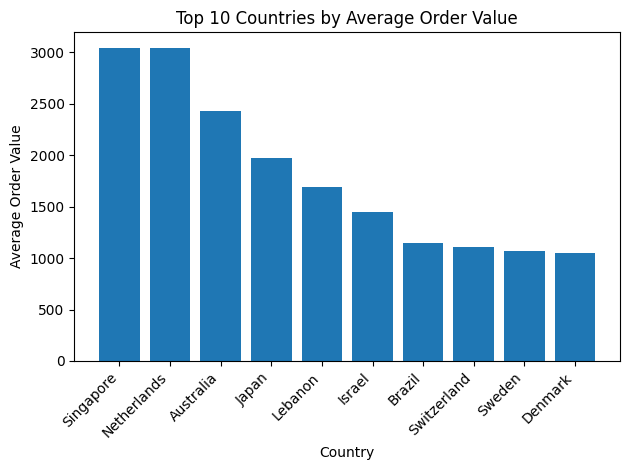

In [ ]:
#Bar graph displaying top 10 countries with the highest average order value
top_10_countries = average_order_value_country.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Top 10 Countries by Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

            Recency  Frequency  Monetary  R        F  M RFM_Score
CustomerID                                                       
12346.0         326          1  77183.60  1  (0, 52]  4   (5, 57]
12347.0           2          7   4310.00  4  (0, 52]  4   (8, 60]
12348.0          75          4   1797.24  2  (0, 52]  4   (6, 58]
12349.0          19          1   1757.55  3  (0, 52]  4   (7, 59]
12350.0         310          1    334.40  1  (0, 52]  2   (3, 55]


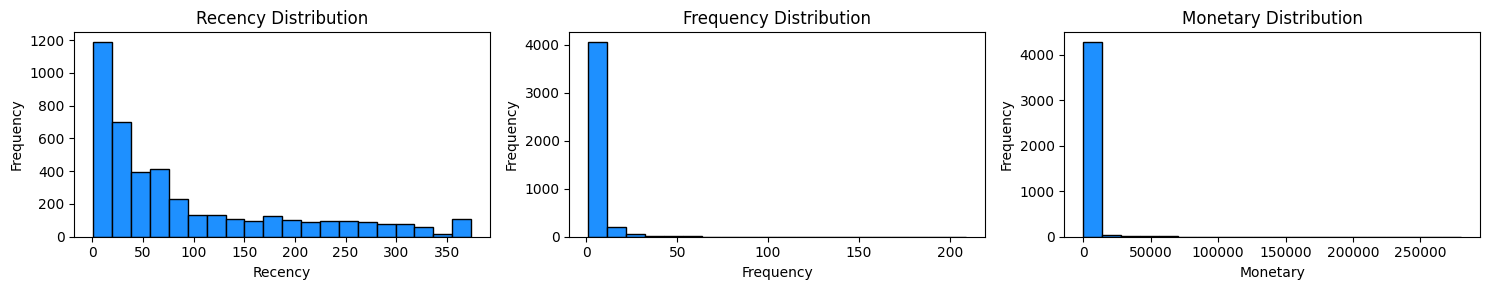

In [ ]:
#How does the customer count vary across RFM segments (e.g., High Recency, High Frequency, High Monetary)?
# Drop missing values in 'InvoiceNo' and 'CustomerID' columns
df = df.dropna(subset=['InvoiceNo', 'CustomerID'])

# Calculate the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Calculate Recency, Frequency, and Monetary
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Define the segments by creating bins based on percentiles
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=list(range(4, 0, -1)))
rfm['F'] = pd.cut(rfm['Frequency'], bins=pd.interval_range(start=0, end=rfm['Frequency'].max() + 1, freq=rfm['Frequency'].max() // 4), labels=list(range(1, 5)), include_lowest=True)
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=list(range(1, 5)))

# Calculate the RFM_Score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Display the RFM DataFrame
print(rfm.head())

# Plot the distribution of Recency, Frequency, and Monetary values
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

axes[0].hist(rfm['Recency'], bins=20, color='dodgerblue', edgecolor='k')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

axes[1].hist(rfm['Frequency'], bins=20, color='dodgerblue', edgecolor='k')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

axes[2].hist(rfm['Monetary'], bins=20, color='dodgerblue', edgecolor='k')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




In [ ]:
#What is the percentage of revenue generated by the top 20% of customers (Pareto principle)?
top_20_customers = rfm['Monetary'].nlargest(int(0.2 * len(rfm)))
top_20_revenue = top_20_customers.sum()
total_revenue = rfm['Monetary'].sum()
percentage_revenue = (top_20_revenue / total_revenue) * 100
print(f"Percentage of revenue generated by top 20% customers: {percentage_revenue:.2f}%")

Percentage of revenue generated by top 20% customers: 74.66%


In [ ]:
#What are the top 5 most common words in product descriptions?
from collections import Counter
from string import punctuation

product_descriptions = df['Description'].dropna().tolist()
word_count = Counter(" ".join(product_descriptions).translate(str.maketrans("", "", punctuation)).split()).most_common(5)
print(word_count)

[('OF', 40185), ('SET', 40152), ('BAG', 37413), ('RED', 31480), ('HEART', 28906)]


**Pareto principle**

To determine the percentage of revenue generated by the top 20% of customers.

In [ ]:
filtered_df = df[df['TotalPrice'] > 0]  

# Calculate the total revenue for each customer
customer_revenue = filtered_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Sort the customers by their total revenue in descending order
customer_revenue_sorted = customer_revenue.sort_values('TotalPrice', ascending=False)

# Calculate the cumulative revenue for the top 20% of customers
top_20_percent_customers = int(0.2 * len(customer_revenue_sorted))
top_20_percent_revenue = customer_revenue_sorted.iloc[:top_20_percent_customers]['TotalPrice'].sum()

# Calculate the total revenue for all customers
total_revenue = customer_revenue_sorted['TotalPrice'].sum()

# Calculate the percentage of revenue generated by the top 20% of customers
pareto_percentage = (top_20_percent_revenue / total_revenue) * 100

print(f"The top 20% of customers generate {pareto_percentage:.2f}% of the total revenue.")


The top 20% of customers generate 74.66% of the total revenue.


**Seasonality**:

What is the month with the highest and lowest number of transactions?

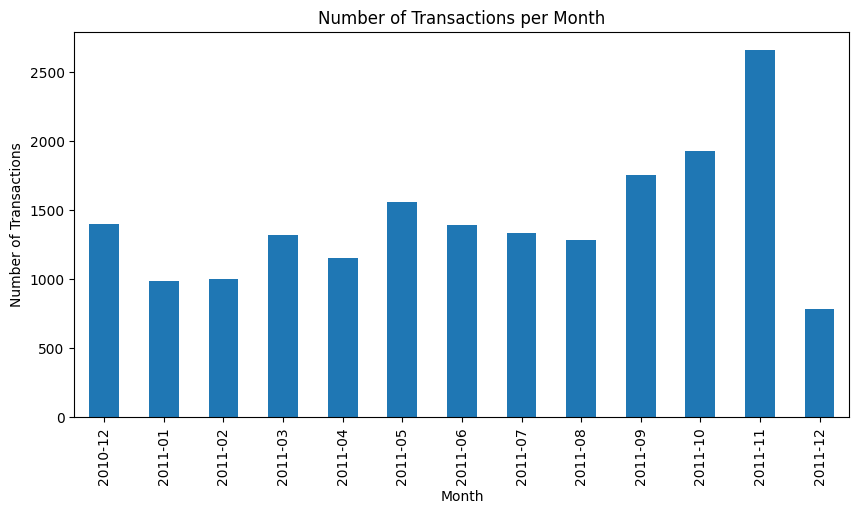

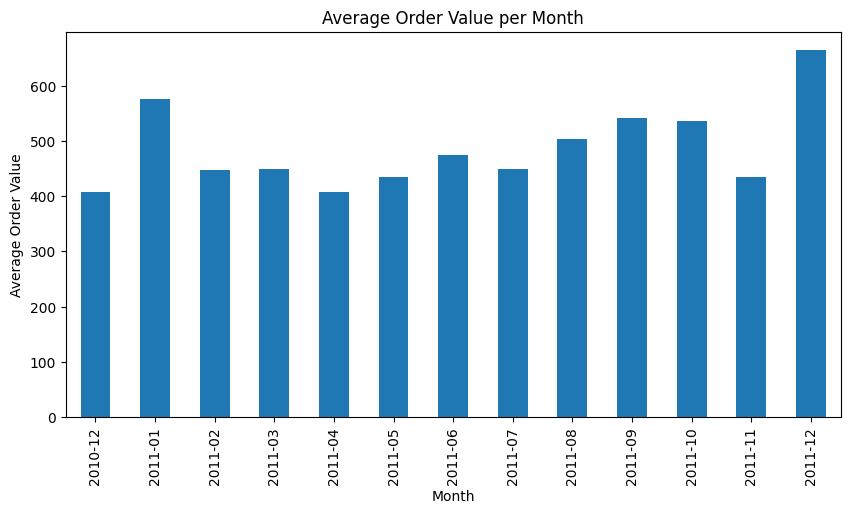

      Month  Average Order Value  Number of Transactions
0   2010-12           407.444807                    1400
1   2011-01           575.583901                     987
2   2011-02           447.427202                     997
3   2011-03           449.721241                    1321
4   2011-04           407.636493                    1149
5   2011-05           435.598167                    1555
6   2011-06           473.830617                    1393
7   2011-07           450.009693                    1331
8   2011-08           503.164875                    1280
9   2011-09           541.703819                    1755
10  2011-10           536.880482                    1929
11  2011-11           435.154539                    2657
12  2011-12           664.769203                     778


In [ ]:
#Extract month and year information from the 'InvoiceDate' column:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

#Calculate the number of transactions per month:
transactions_per_month = df.groupby('Month')['InvoiceNo'].nunique()

#Plot the number of transactions per month to visualize seasonality:
import matplotlib.pyplot as plt

transactions_per_month.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

#Calculate the average order value per month:
monthly_order_value = df.groupby(['Month', 'InvoiceNo'])['TotalPrice'].sum().reset_index()
average_order_value_per_month = monthly_order_value.groupby('Month')['TotalPrice'].mean()

#Plot the average order value per month to better understand the relationship between order value and the number of transactions:
average_order_value_per_month.plot(kind='bar', figsize=(10, 5))
plt.title('Average Order Value per Month')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.show()

#Display the table
average_order_value_per_month_df = average_order_value_per_month.reset_index()
transactions_per_month_df = transactions_per_month.reset_index()
monthly_summary = pd.merge(average_order_value_per_month_df, transactions_per_month_df, on='Month', how='inner')
monthly_summary.columns = ['Month', 'Average Order Value', 'Number of Transactions']
print(monthly_summary)




**Brief Summary of key observations: We can observe several takeaways from our analysis:**

- The United Kingdom has the highest number of unique customers, accounting for 90.37% of the total customer base.

- The top 10 most popular products are led by the WHITE HANGING HEART T-LIGHT HOLDER, with 2016 transactions.

- The most profitable product is PAPER CRAFT, LITTLE BIRDIE, generating 168,469.60 in revenue.

- Singapore has the highest average order value among the top 10 countries, at 3039.90.

- The Pareto principle applies to the dataset, with the top 20% of customers generating 74.66% of total revenue.

- Four relevant common words in product descriptions include "SET," "RED," "HEART," and "BAG."

- Transactions increase leading up to October and November, likely due to the holiday season.

- The average order value peaks in December 2011, indicating customers make larger purchases during the holidays.

- There is a drop in transactions and average order value in January and February, possibly due to post-holiday spending fatigue.

- Insights from this analysis can be used to optimize marketing strategies, allocate resources effectively, and enhance overall business performance.

- This project aims to perform cohort analysis and customer 
segmentation using RFM (Recency, Frequency, Monetary) analysis to gain insights into customer behavior and identify actionable business opportunities.

- The dataset used in this project is a transnational data set containing transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based, non-store online retail company. The dataset comprises 541,909 instances, including 8 attributes.

- By analyzing customer behavior based on Recency, Frequency, and Monetary value, businesses can gain a deeper understanding of customer retention, churn rate, and customer lifetime value.

- The ability to identify high-value customers and design tailor-made services for specific customer segments can lead to increased revenue and customer loyalty.

- There are 4372 unique customers in the dataset. The average number of transactions per customer is 5.08. The average revenue per transaction is 373.07.

- The majority of customers in the dataset are from the United Kingdom. Some of the European countries with lower customer numbers (Greece with 4) - are on par with countries with a bigger population- like the US with also 4. We can decipher that the conversion rate is better in that region. Our most popular region is Europe, with the UK bringing in around 3950 customers.
 





**Challenges**

We were confronted with the task of effectively presenting our data, and we approached this challenge by adopting the perspective of an online retailer. By considering what we would want to see in order to enhance our website and sales data, we were able to overcome this question.

**Conclusion**

In conclusion, this project utilized RFM analysis to perform cohort analysis and customer segmentation on a transnational data set containing transactions of a UK-based, non-store online retail company. The analysis provided valuable insights into customer behavior, including customer retention, churn rate, and customer lifetime value, enabling the identification of actionable business opportunities.

One key insight drawn from our analysis is the application of the Pareto principle, which revealed that the top 20% of customers generate 74.66% of the total revenue. This finding emphasizes the importance of understanding and catering to high-value customers to optimize marketing strategies, improve customer loyalty, and enhance overall performance.

The Pareto principle's importance in our analysis highlights the need for effective customer segmentation and the prioritization of resources. By focusing on high-value customers, businesses can allocate marketing budgets, customer support, and other resources more efficiently, leading to a higher return on investment. Furthermore, recognizing that a significant portion of revenue comes from a smaller percentage of customers allows businesses to concentrate on initiatives that drive profitability and improve overall efficiency.

Our data analysis project identified five common words in product descriptions, four of which are relevant to understanding customer preferences and the product landscape: "SET," "RED," "HEART," and "BAG." The fifth word, "OF," is considered irrelevant as it does not provide any specific insight into the products themselves. The relevant common words offer valuable information about the types of products that are popular or frequently purchased. This understanding can inform marketing campaigns, product development strategies, and inventory management to align with customer preferences.

The data shows that there is an increase in the number of transactions leading up to October and November, possibly due to the approaching holiday season. Consequently, businesses can anticipate higher customer engagement during these months and plan their marketing strategies and inventory accordingly. Additionally, the average order value reaches its highest point in December 2011, further supporting the idea that customers are more likely to make larger purchases during the holiday season.

However, there is a drop in the number of transactions and average order value in the months following the holiday season, particularly in January and February. This trend suggests that customers are less engaged with the business during these months, possibly due to post-holiday spending fatigue. As a result, businesses might consider implementing promotional campaigns or special offers during these periods to maintain customer engagement and boost sales.


The insights gained from this analysis can assist businesses in identifying high-value customers, designing tailor-made services for specific customer segments, optimizing marketing strategies, allocating resources effectively, and ultimately enhancing overall business performance.

 **Citation**

Murphy, C. (2023, January 19). What is recency, Frequency, monetary value (RFM) in marketing? Investopedia., from https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp 

Chat.openai.com. (n.d.). Retrieved from https://chat.openai.com/ 

The data is sourced from the UCI Machine Learning Repository and Kaggle:https://archive.ics.uci.edu/ml/datasets/Online+Retail#\nhttps://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

The dataset was donated by Dr. Daqing Chen, Director of the Public Analytics group at the School of Engineering, London South Bank University, UK.

